d:\Segundo Cuatrimestre 2025\APS\APS-VSC\APS-Serena\Lib\site-packages\scipy\signal\_filter_design.py:1230: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


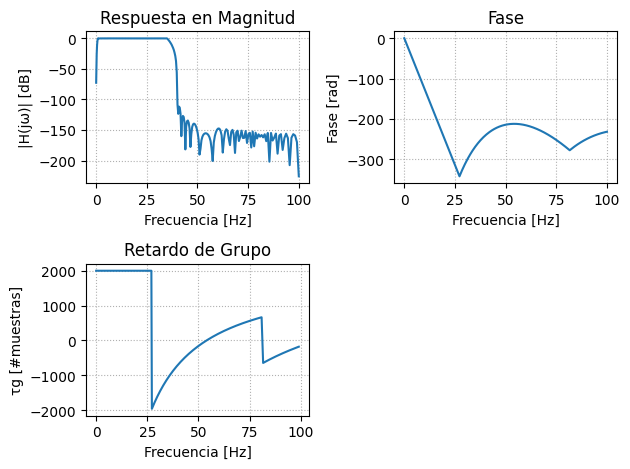

ValueError: The inputs desired and weight must have same length.
  The input bands must have twice this length.

In [18]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import remez

#%%

#Filtro digital  usando valores del ECG

fs = 1000 #Hz
wp = [0.8, 35] #frecuencia de corte (Hz)
ws = [0.1, 40] #frecuencia de stop (Hz) arriba de los 35 debe ser la segunda
#queremos q saque toda la frecuencia menor a 1 Hz (0.8)

alpha_p = 1/2 #atenuación de corte (db), alpha maxima en bp
alpha_s = 40/2 #atenuación de stop (db), alpha minima en bs

f_aprox="butter"
#f_aprox="cheby1"
#f_aprox="cheby2"
#f_aprox="cauer"

mi_sos = signal.iirdesign(wp=wp, ws= ws, gpass=alpha_p, gstop=alpha_s, analog=False, ftype=f_aprox, output='sos', fs = fs) #tiene polinomios de orden 2 (b0,b1,b2,a0,a1,a2) y de ornde de filtro N/2=38 (74 de orden)
#np.logspace(1,6,1000) = espacio logaritmicamente espaciado con 1000 espacios entre 10 a la 1 y 10 a la 6

w, h = signal.freqz_sos(mi_sos, worN=np.logspace(-2,1.9,1000), fs = fs)

phase = np.unwrap(np.angle(h)) #con unwrap evita la discontinuidad de fase (discontinuidad evitable)

w_rad = w / (fs/2) *np.pi
gd = -np.diff(phase)/np.diff(w_rad) #retardo de grupo

z, p, k = signal.sos2zpk(mi_sos)

# # Magnitud
# plt.subplot(2,2,1)
# plt.plot(w, 20*np.log10(abs(h)), label = f_aprox)
# plt.title('Respuesta en Magnitud')
# plt.xlabel('Frecuencia [Hz]')
# plt.ylabel('|H(jω)| [dB]')
# plt.grid(True, which='both', ls=':')

# # Fase
# plt.subplot(2,2,2)
# plt.plot(w, (phase), label = f_aprox)
# plt.title('Fase')
# plt.xlabel('Frecuencia [Hz]')
# plt.ylabel('Fase [rad]')
# plt.grid(True, which='both', ls=':')

# # Retardo de grupo
# plt.subplot(2,2,3)
# plt.plot(w[:-1], gd, label = f_aprox)
# plt.title('Retardo de Grupo')
# plt.xlabel('Frecuencia [Hz]')
# plt.ylabel('τg [#muestras]')
# plt.grid(True, which='both', ls=':')

# # Diagrama de polos y ceros
# plt.subplot(2,2,4)
# plt.plot(np.real(p), np.imag(p), 'x', markersize=10, label=f'{f_aprox}Polos')
# if len(z) > 0:
#     plt.plot(np.real(z), np.imag(z), 'o', markersize=10, fillstyle='none', label=f'{f_aprox}Ceros')
# plt.axhline(0, color='k', lw=0.5)
# plt.axvline(0, color='k', lw=0.5)
# plt.title('Diagrama de Polos y Ceros (plano s)')
# plt.xlabel('σ [rad/s]')
# plt.ylabel('jω [rad/s]')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()



# %%
    
#Diseño de FIIR con metodo de ventanas usando firwin2

wp = [0.8, 35] #frecuencia de corte (Hz)
ws = [0.1, 40] #frecuencia de stop (Hz) arriba de los 35 debe ser la segunda

frecuencias = np.sort(np.concatenate(((0, fs/2), wp, ws)))
deseado = [0, 0 ,1, 1, 0, 0] #es las respuesta deseada, debe ser un pasa banda
cant_coef = 2000
retardo = (cant_coef - 1)//2

cant_coef_ls = 2001
retardo_ls = (cant_coef - 1)//2

# Aseguramos que nfreqs sea mayor que numtaps
nfreqs = max(int((np.ceil(np.sqrt(cant_coef)) * 2) * 2) - 1, cant_coef + 1)

fir_win_rect = signal.firwin2(numtaps = cant_coef, freq = frecuencias, gain = deseado, nfreqs = nfreqs ,window = 'boxcar', fs = fs)

fir_win_ls = signal.firls(numtaps = cant_coef_ls, bands = frecuencias, desired = deseado,  fs = fs)

fir_win_rect = np.convolve(fir_win_rect, fir_win_rect)

w, h = signal.freqz(b = fir_win_rect, worN=np.logspace(-2,2,1000),fs = fs)

phase = np.unwrap(np.angle(h)) #con unwrap evita la discontinuidad de fase (discontinuidad evitable)

w_rad = w / (fs/2) *np.pi
gd = -np.diff(phase)/np.diff(w_rad) #retardo de grupo

# z, p, k = signal.sos2zpk(signal.tf2sos(b=fir_win_rect, a=1))

# Magnitud
plt.subplot(2,2,1)
plt.plot(w, 20*np.log10(abs(h)), label = f_aprox)
# plot_plantilla(filter_type = 'bandpass', fpass = wp, ripple = alpha_p*2, fstop = wp, )
plt.title('Respuesta en Magnitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', ls=':')

# Fase
plt.subplot(2,2,2)
plt.plot(w, (phase), label = f_aprox)
plt.title('Fase')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [rad]')
plt.grid(True, which='both', ls=':')

# Retardo de grupo
plt.subplot(2,2,3)
plt.plot(w[:-1], gd, label = f_aprox)
plt.title('Retardo de Grupo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('τg [#muestras]')
plt.grid(True, which='both', ls=':')

# # Diagrama de polos y ceros
# plt.subplot(2,2,4)
# plt.plot(np.real(p), np.imag(p), 'x', markersize=10, label=f'{f_aprox}Polos')
# if len(z) > 0:
#     plt.plot(np.real(z), np.imag(z), 'o', markersize=10, fillstyle='none', label=f'{f_aprox}Ceros')
# plt.axhline(0, color='k', lw=0.5)
# plt.axvline(0, color='k', lw=0.5)
# plt.title('Diagrama de Polos y Ceros (plano z)')
# plt.xlabel('σ [rad/s]')
# plt.ylabel('jω [rad/s]')
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()

# %%
# Diseño de filtro FIR con remez (Parks-McClellan)
fs = 1000  # Frecuencia de muestreo
numtaps = 201  # Número de coeficientes del filtro

# Bandas y ganancias ajustadas
bands = [0, 0.8, 0.8, 35, 35, 40, 40, fs/2]  # Define frequency bands
desired = [0, 0, 1, 1, 0, 0]  # Desired gain in each band

# Normalización de las bandas
bands = [b / (fs / 2) for b in bands]

# Diseño del filtro
fir_remez = remez(numtaps, bands, desired, fs=fs)

# Respuesta en frecuencia
w, h = signal.freqz(fir_remez, worN=8000, fs=fs)

# Visualización
plt.figure()
plt.plot(w, np.abs(h))
plt.title('Respuesta en Magnitud del Filtro FIR diseñado con remez')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid()
plt.show()

#%%

#Divido por 2 a los alfas pq con el filtfilt se va al doble de ripple sino (y doble de atenuación que es bueno eso) y asi podemos neutralizar la fase tranquilamente
mi_sos_butt = signal.iirdesign(wp=wp, ws= ws, gpass=alpha_p/2, gstop=alpha_s/2, analog=False, ftype="butter", output='sos', fs = fs)
mi_sos_cheby1 = signal.iirdesign(wp=wp, ws= ws, gpass=alpha_p/2, gstop=alpha_s/2, analog=False, ftype="cheby1", output='sos', fs = fs)
mi_sos_cheby2 = signal.iirdesign(wp=wp, ws= ws, gpass=alpha_p/2, gstop=alpha_s/2, analog=False, ftype="cheby2", output='sos', fs = fs)
mi_sos_cauer = signal.iirdesign(wp=wp, ws= ws, gpass=alpha_p/2, gstop=alpha_s/2, analog=False, ftype="cauer", output='sos', fs = fs)


#ECG
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = mat_struct['ecg_lead'].flatten()
N = len(ecg_one_lead)
cant_muestras = N


ecg_filt_butt = signal.sosfiltfilt(mi_sos_butt, ecg_one_lead)
# ecg_filt_cheby1 = signal.sosfiltfilt(mi_sos_cheby1, ecg_one_lead)
# ecg_filt_cheby2 = signal.sosfiltfilt(mi_sos_cheby2, ecg_one_lead)
# ecg_filt_cauer = signal.sosfiltfilt(mi_sos_cauer, ecg_one_lead)

ecg_filt_win = signal.lfilter(b = fir_win_rect, a = 1, x = ecg_one_lead)

plt.figure()
plt.plot(ecg_one_lead[:100000], label = 'ECG')
plt.plot(ecg_filt_butt[:100000], label = 'butter')
# plt.plot(ecg_filt_cauer[:100000], label = 'cauer')
# plt.plot(ecg_filt_cheby1[:100000], label = 'cheby1')
# plt.plot(ecg_filt_cheby2[:100000], label = 'cheby2')
plt.legend()

#################################
# Regiones de interés sin ruido #
#################################

cant_muestras = len(ecg_one_lead)

regs_interes = (
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )
 
for ii in regs_interes:
   
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
   
    plt.figure()
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ecg_filt_butt[zoom_region], label='Butterworth')
    plt.plot(zoom_region, ecg_filt_win[zoom_region + retardo], label='FIR Window')
   
    plt.title('ECG sin ruido desde ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
   
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
           
    plt.show()
 
#################################
# Regiones de interés con ruido #
#################################
 
regs_interes = (
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )
 
for ii in regs_interes:
   
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
   
    plt.figure()
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ecg_filt_butt[zoom_region], label='Butterworth')
    plt.plot(zoom_region, ecg_filt_win[zoom_region + retardo], label='FIR Window')
   
    plt.title('ECG con ruido desde ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
   
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
           
    plt.show()